In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ModelLib


In [16]:
model = ModelLib.SIRModels()
pcap = model.p_cap

/Users/simonblaue/Desktop/Epidemics_SRI_model/ModelLib.py:20: RuntimeWarning: overflow encountered in exp
  self.P = lambda H: self.p_base+(1-self.p_base)/self.p_cap*self.epsilon*np.log(1+np.exp(1/self.epsilon*(self.p_cap-H)))


In [17]:
pcap = 0.4
p_base = 0.1

In [18]:

P = lambda x: (1-p_base)/(1+np.exp(epsilon*(1/(pcap2-x)+1/(pcap1-x))))+p_base

In [19]:
p_func_small_I = []
d_pcap1 = pcap/2
pcap1 = pcap/2-d_pcap1
pcap2 = pcap/2+d_pcap1
epsilon = pcap2

x1 = np.arange(0,pcap,0.001)
for H in x1:
    if H>pcap2:
        p_func_small_I.append(model.p_base)
        continue
    if H<=pcap1: 
        p_func_small_I.append(1)
        continue
    if H>pcap1:
        p_func_small_I.append(P(H))
        continue
    else:
        p_func_small_I.append(None)

In [20]:
p_func_big_I = []
d_pcap2 = 0.05
pcap1 = pcap/2-d_pcap2
pcap2 = pcap/2+d_pcap2
epsilon = pcap2
x2 = np.arange(-0.01,pcap+0.01,0.001)

for H in x2:
    if H>=pcap2:
        p_func_big_I.append(model.p_base)
        continue
    if H<=pcap1: 
        p_func_big_I.append(1)
        continue
    if H>pcap1:
        p_func_big_I.append(P(H))
        continue
    else:
        p_func_big_I.append(None)

/var/folders/m7/k82fqv6524xf0hm4dfd2fj8h0000gn/T/ipykernel_36494/846516221.py:1: RuntimeWarning: overflow encountered in exp
  P = lambda x: (1-p_base)/(1+np.exp(epsilon*(1/(pcap2-x)+1/(pcap1-x))))+p_base


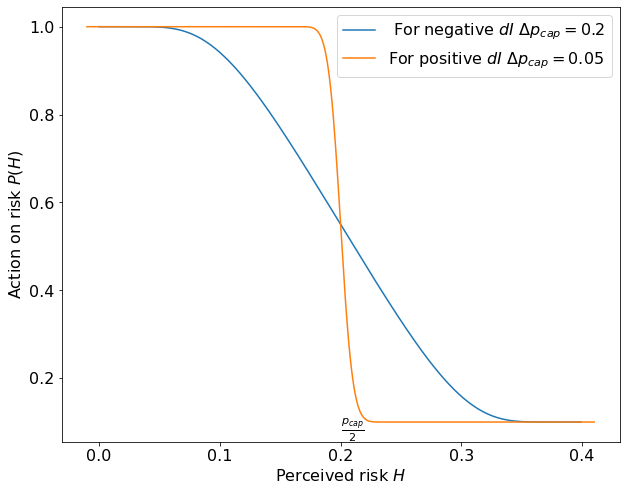

In [21]:
plt.figure(figsize=(10,8))
plt.rc('font', size=16) 
plt.plot(x1,p_func_small_I, label=r" For negative $ dI$ $ \Delta p_{cap} = $" + f"{d_pcap1}")
plt.plot(x2,p_func_big_I, label=r"For positive $ dI$ $ \Delta p_{cap} = $" + f"{d_pcap2}")
plt.xlabel(r"Perceived risk $H$")
plt.ylabel(r"Action on risk $P(H)$")
plt.annotate(r'$\frac{p_{cap}}{2}$', (pcap/2,1), xytext=(pcap/2, 0.07), arrowprops={'headwidth':0,'linestyle': '', 'width':0})
#plt.annotate(r'$p_{base}$', (-0.01,p_base), xytext=(pcap2+0.011, p_base), arrowprops={'headwidth':0,'linestyle': '', 'width':0})
plt.legend()
plt.show()